In [1]:
import pandas as pd

In [4]:
from glob import glob
datasets = glob("*.csv")
datasets

['champs.csv',
 'matches.csv',
 'participants.csv',
 'stats1.csv',
 'stats2.csv',
 'teambans.csv',
 'teamstats.csv']

In [7]:
for dataset in datasets:
    print(f'df1 = pd.read_csv("{dataset}")')

df1 = pd.read_csv("champs.csv")
df1 = pd.read_csv("matches.csv")
df1 = pd.read_csv("participants.csv")
df1 = pd.read_csv("stats1.csv")
df1 = pd.read_csv("stats2.csv")
df1 = pd.read_csv("teambans.csv")
df1 = pd.read_csv("teamstats.csv")


In [18]:
pd.set_option('display.max_columns', None)

df1 = pd.read_csv("champs.csv")
df2 = pd.read_csv("matches.csv")
df3 = pd.read_csv("participants.csv")
df4 = pd.read_csv("stats1.csv")
df5 = pd.read_csv("stats2.csv")
stats_merged = pd.concat([df4,df5], ignore_index=True)
df6 = pd.read_csv("teambans.csv")
df7 = pd.read_csv("teamstats.csv")

C:\Users\peter\AppData\Local\Temp\ipykernel_14664\2093607020.py:7: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv("stats2.csv")


In [67]:
tanks = pd.read_csv("tanks.csv")
tanks['champion'] = tanks['champion'].apply(lambda x: x.replace(" ", "").replace("_", "").lower().replace("'", "").replace(".", ""))
types_and_spikes = pd.read_csv("types_and_spikes.csv")
types_and_spikes['champion'] = types_and_spikes['champion'].apply(lambda x: x.replace(" ", "").replace("_", "").lower().replace("'", "").replace(".", ""))

In [68]:
comps = pd.read_csv("comps.csv")
comps['Champion'] = comps['Champion'].apply(lambda x: x.replace(".", "").replace("'", "").replace("_", "").lower())
comps = comps.set_index('Champion').to_dict()
df = pd.read_csv("participants.csv")
champions_df = pd.read_csv("champs.csv")
champions_df['name'] = champions_df['name'].apply(lambda x: x.replace(" ", "").replace("_", "").lower())

champ_lookup = champions_df.set_index('id')['name'].to_dict()
df['champ'] = df['championid'].apply(lambda x: champ_lookup[x])
df['comp1'] = df['champ'].apply(lambda x: comps['Role'][x])
df['comp2'] = df['champ'].apply(lambda x: comps['Role.1'][x])
df = df.join(stats_merged.set_index('id'), on='id', how='inner')
df = df.join(tanks.set_index('champion'), on='champ', how='left').join(types_and_spikes.set_index('champion'), on='champ', how='left')
df

,id,matchid,player,championid,ss1,ss2,role,position,champ,comp1,comp2,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood,squishy_vs_tank,Type,Early,Middle,Late
0,9,10,1,19,4,11,NONE,JUNGLE,warwick,pick,engage,0,3748,2003,3111,3053,1419,1042,3340,6,10,1,2,2,2,643,2,0,0,0,0,96980,25154,65433,6392,0,9101,3975,4237,888,15160,1,23998,1826,1170,14,0,41446,13270,24957,3218,10497,10275,0,0,42,69,42,27,610,13,0,0,10,0,0,Tank,Duelist,3,2,1
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,nami,protect,siege,0,2301,3111,3190,3107,0,0,3364,0,2,12,0,0,0,1116,0,0,0,0,0,25995,17633,6295,2066,0,8478,6684,977,816,11707,5,9402,1943,1852,30,0,17769,7945,7688,2136,9496,7975,1,0,17,1,1,0,211,14,1,0,17,3,0,Squishy,Support,2,3,2
2,11,10,3,119,7,4,DUO_CARRY,BOT,draven,split,siege,0,1055,3072,3006,3031,3046,1036,3340,7,8,5,5,2,1,584,2,0,0,0,0,171568,1725,169576,266,1042,14425,331,14070,24,2283,2,16612,5094,2128,26,0,25627,12538,11094,1993,13136,11775,0,0,205,3,1,2,182,14,1,0,13,5,0,Squishy,Glass_Cannon,3,3,2
3,12,10,4,114,12,4,SOLO,TOP,fiora,split+,pick,0,1029,3078,3156,1001,3053,0,3340,5,11,2,2,1,1,300,0,0,0,0,0,113721,989,109563,3168,455,15267,296,11802,3168,4252,1,27174,8263,8263,5,0,31705,10280,19506,1918,11006,10683,3,0,164,6,6,0,106,15,0,0,3,0,0,Squishy,Duelist,1,2,3
4,13,10,5,112,4,3,SOLO,MID,viktor,siege,engage,0,3020,1058,3198,3102,1052,1026,3340,2,8,2,0,1,0,504,0,0,0,0,0,185302,166671,16867,1763,0,18229,17925,28,275,1525,1,14616,3801,1724,15,0,20585,6850,11119,2615,11439,10485,1,0,235,4,3,1,159,15,0,0,10,0,0,Squishy,Glass_Cannon,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834515,1865600,187588,6,222,4,7,DUO_CARRY,BOT,jinx,protect+,siege,0,3035,1053,3031,1304,3102,3046,3363,11,10,2,4,3,3,957,1,1,0,0,0,273007,2950,269451,606,764,27130,1648,25017,464,3721,4,0,0,0,0,0,30220,10163,19684,372,16413,15215,1,0,292,27,20,7,127,18,3,\N,13,1,0,Squishy,Glass_Cannon,1,2,3
1834516,1865601,187588,7,1,14,4,SOLO,MID,annie,engage,pick,0,3089,3285,3157,1314,1052,0,3340,11,9,7,2,1,3,728,0,0,0,0,0,151922,135783,14598,1540,0,28805,26422,842,1540,982,1,0,0,0,0,0,21003,9991,10739,273,13340,12575,0,0,189,3,3,0,128,18,0,\N,13,0,0,Squishy,Glass_Cannon,3,3,2
1834517,1865602,187588,8,53,4,3,DUO_SUPPORT,BOT,blitzcrank,pick,engage,0,1329,3190,3069,3025,1011,3082,3340,4,8,10,2,1,1,1011,0,0,0,0,0,66799,50210,16530,58,0,12681,9312,3310,58,3781,1,0,0,0,0,0,31520,10931,20136,451,11972,11285,1,0,59,0,0,0,304,17,0,\N,5,0,0,Tank,Tank,3,2,1
1834518,1865603,187588,9,92,4,11,NONE,JUNGLE,riven,split+,pick,0,3074,3071,3707,1033,1036,0,3340,2,11,3,2,1,1,751,0,0,0,0,0,113800,4377,97042,12381,0,8878,36,8451,391,663,1,0,0,0,0,0,31790,8612,22836,342,10041,9430,0,0,53,47,40,7,101,15,0,\N,8,1,0,Tank,Duelist,2,2,3


In [69]:
df.Type.unique()

array(['Duelist', 'Support', 'Glass_Cannon', 'Tank', 'Chase_Runners'],
      dtype=object)

In [77]:
df['is_tanky'] = df['squishy_vs_tank'].apply(lambda x: 1 if x == 'Tank' else 0)
df['is_duelist'] = df['Type'].apply(lambda x: 1 if x == 'Duelist' else 0)
df['is_support'] = df['Type'].apply(lambda x: 1 if x == 'Support' else 0)
df['is_glass_cannon'] = df['Type'].apply(lambda x: 1 if x == 'Glass_Cannon' else 0)
df['is_tank'] = df['Type'].apply(lambda x: 1 if x == 'Tank' else 0)
df['is_chase_runners'] = df['Type'].apply(lambda x: 1 if x == 'Chase_Runners' else 0)
df


,id,matchid,player,championid,ss1,ss2,role,position,champ,comp1,comp2,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood,squishy_vs_tank,Type,Early,Middle,Late,is_tanky,is_duelist,is_support,is_glass_cannon,is_tank,is_chase_runners
0,9,10,1,19,4,11,NONE,JUNGLE,warwick,pick,engage,0,3748,2003,3111,3053,1419,1042,3340,6,10,1,2,2,2,643,2,0,0,0,0,96980,25154,65433,6392,0,9101,3975,4237,888,15160,1,23998,1826,1170,14,0,41446,13270,24957,3218,10497,10275,0,0,42,69,42,27,610,13,0,0,10,0,0,Tank,Duelist,3,2,1,1,1,0,0,0,0
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,nami,protect,siege,0,2301,3111,3190,3107,0,0,3364,0,2,12,0,0,0,1116,0,0,0,0,0,25995,17633,6295,2066,0,8478,6684,977,816,11707,5,9402,1943,1852,30,0,17769,7945,7688,2136,9496,7975,1,0,17,1,1,0,211,14,1,0,17,3,0,Squishy,Support,2,3,2,0,0,1,0,0,0
2,11,10,3,119,7,4,DUO_CARRY,BOT,draven,split,siege,0,1055,3072,3006,3031,3046,1036,3340,7,8,5,5,2,1,584,2,0,0,0,0,171568,1725,169576,266,1042,14425,331,14070,24,2283,2,16612,5094,2128,26,0,25627,12538,11094,1993,13136,11775,0,0,205,3,1,2,182,14,1,0,13,5,0,Squishy,Glass_Cannon,3,3,2,0,0,0,1,0,0
3,12,10,4,114,12,4,SOLO,TOP,fiora,split+,pick,0,1029,3078,3156,1001,3053,0,3340,5,11,2,2,1,1,300,0,0,0,0,0,113721,989,109563,3168,455,15267,296,11802,3168,4252,1,27174,8263,8263,5,0,31705,10280,19506,1918,11006,10683,3,0,164,6,6,0,106,15,0,0,3,0,0,Squishy,Duelist,1,2,3,0,1,0,0,0,0
4,13,10,5,112,4,3,SOLO,MID,viktor,siege,engage,0,3020,1058,3198,3102,1052,1026,3340,2,8,2,0,1,0,504,0,0,0,0,0,185302,166671,16867,1763,0,18229,17925,28,275,1525,1,14616,3801,1724,15,0,20585,6850,11119,2615,11439,10485,1,0,235,4,3,1,159,15,0,0,10,0,0,Squishy,Glass_Cannon,2,2,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834515,1865600,187588,6,222,4,7,DUO_CARRY,BOT,jinx,protect+,siege,0,3035,1053,3031,1304,3102,3046,3363,11,10,2,4,3,3,957,1,1,0,0,0,273007,2950,269451,606,764,27130,1648,25017,464,3721,4,0,0,0,0,0,30220,10163,19684,372,16413,15215,1,0,292,27,20,7,127,18,3,\N,13,1,0,Squishy,Glass_Cannon,1,2,3,0,0,0,1,0,0
1834516,1865601,187588,7,1,14,4,SOLO,MID,annie,engage,pick,0,3089,3285,3157,1314,1052,0,3340,11,9,7,2,1,3,728,0,0,0,0,0,151922,135783,14598,1540,0,28805,26422,842,1540,982,1,0,0,0,0,0,21003,9991,10739,273,13340,12575,0,0,189,3,3,0,128,18,0,\N,13,0,0,Squishy,Glass_Cannon,3,3,2,0,0,0,1,0,0
1834517,1865602,187588,8,53,4,3,DUO_SUPPORT,BOT,blitzcrank,pick,engage,0,1329,3190,3069,3025,1011,3082,3340,4,8,10,2,1,1,1011,0,0,0,0,0,66799,50210,16530,58,0,12681,9312,3310,58,3781,1,0,0,0,0,0,31520,10931,20136,451,11972,11285,1,0,59,0,0,0,304,17,0,\N,5,0,0,Tank,Tank,3,2,1,1,0,0,0,1,0
1834518,1865603,187588,9,92,4,11,NONE,JUNGLE,riven,split+,pick,0,3074,3071,3707,1033,1036,0,3340,2,11,3,2,1,1,751,0,0,0,0,0,113800,4377,97042,12381,0,8878,36,8451,391,663,1,0,0,0,0,0,31790,8612,22836,342,10041,9430,0,0,53,47,40,7,101,15,0,\N,8,1,0,Tank,Duelist,2,2,3,1,1,0,0,0,0


In [83]:
match_df = pd.DataFrame(df[['matchid']]['matchid'].unique(), columns=['matchid'])
win_dict = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['win'].max().to_dict()
match_df['team_1_wins'] = match_df['matchid'].apply(lambda x: win_dict.get(x, -1))

is_tanky_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['is_tanky'].sum().to_dict()
match_df['team_1_num_tanky'] = match_df['matchid'].apply(lambda x: is_tanky_dict_team1.get(x, -1))
is_tanky_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['is_tanky'].sum().to_dict()
match_df['team_2_num_tanky'] = match_df['matchid'].apply(lambda x: is_tanky_dict_team2.get(x, -1))

is_duelist_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['is_duelist'].sum().to_dict()
match_df['team_1_is_duelists'] = match_df['matchid'].apply(lambda x: is_duelist_dict_team1.get(x, -1))
is_duelist_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['is_duelist'].sum().to_dict()
match_df['team_2_is_duelists'] = match_df['matchid'].apply(lambda x: is_duelist_dict_team2.get(x, -1))

is_support_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['is_support'].sum().to_dict()
match_df['team_1_is_supports'] = match_df['matchid'].apply(lambda x: is_support_dict_team1.get(x, -1))
is_support_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['is_support'].sum().to_dict()
match_df['team_2_is_supports'] = match_df['matchid'].apply(lambda x: is_support_dict_team2.get(x, -1))

is_glass_cannon_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['is_glass_cannon'].sum().to_dict()
match_df['team_1_is_glass_cannons'] = match_df['matchid'].apply(lambda x: is_glass_cannon_dict_team1.get(x, -1))
is_glass_cannon_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['is_glass_cannon'].sum().to_dict()
match_df['team_2_is_glass_cannons'] = match_df['matchid'].apply(lambda x: is_glass_cannon_dict_team2.get(x, -1))

is_tank_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['is_tank'].sum().to_dict()
match_df['team_1_is_tanks'] = match_df['matchid'].apply(lambda x: is_tank_dict_team1.get(x, -1))
is_tank_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['is_tank'].sum().to_dict()
match_df['team_2_is_tanks'] = match_df['matchid'].apply(lambda x: is_tank_dict_team2.get(x, -1))

is_chase_runners_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['is_chase_runners'].sum().to_dict()
match_df['team_1_is_chase_runners'] = match_df['matchid'].apply(lambda x: is_chase_runners_dict_team1.get(x, -1))
is_chase_runners_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['is_chase_runners'].sum().to_dict()
match_df['team_2_is_chase_runners'] = match_df['matchid'].apply(lambda x: is_chase_runners_dict_team2.get(x, -1))

Early_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['Early'].sum().to_dict()
match_df['team_1_Earlys'] = match_df['matchid'].apply(lambda x: Early_dict_team1.get(x, -1))
Early_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['Early'].sum().to_dict()
match_df['team_2_Earlys'] = match_df['matchid'].apply(lambda x: Early_dict_team2.get(x, -1))

Middle_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['Middle'].sum().to_dict()
match_df['team_1_Middles'] = match_df['matchid'].apply(lambda x: Middle_dict_team1.get(x, -1))
Middle_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['Middle'].sum().to_dict()
match_df['team_2_Middles'] = match_df['matchid'].apply(lambda x: Middle_dict_team2.get(x, -1))

Late_dict_team1 = df.loc[df['player'].isin([1,2,3,4,5])].groupby(['matchid'])['Late'].sum().to_dict()
match_df['team_1_Lates'] = match_df['matchid'].apply(lambda x: Late_dict_team1.get(x, -1))
Late_dict_team2 = df.loc[df['player'].isin([6,7,8,9,10])].groupby(['matchid'])['Late'].sum().to_dict()
match_df['team_2_Lates'] = match_df['matchid'].apply(lambda x: Late_dict_team2.get(x, -1))

match_df = match_df.set_index('matchid')
match_df

,team_1_wins,team_1_num_tanky,team_2_num_tanky,team_1_is_duelists,team_2_is_duelists,team_1_is_supports,team_2_is_supports,team_1_is_glass_cannons,team_2_is_glass_cannons,team_1_is_tanks,team_2_is_tanks,team_1_is_chase_runners,team_2_is_chase_runners,team_1_Earlys,team_2_Earlys,team_1_Middles,team_2_Middles,team_1_Lates,team_2_Lates
matchid,,,,,,,,,,,,,,,,,,,
10,0,1,2,2,1,1,0,2,3,0,1,0,0,11,9,12,13,11,10
11,0,0,2,1,2,0,0,3,3,0,0,1,0,9,14,11,10,12,9
12,0,1,1,0,1,1,1,3,3,1,0,0,0,9,10,12,12,13,11
13,0,2,1,1,1,0,1,1,2,1,1,2,0,11,8,12,11,8,12
14,0,3,2,2,2,0,0,2,3,1,0,0,0,11,14,10,12,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187584,1,1,2,1,2,1,0,1,3,1,0,1,0,10,13,11,11,11,11
187585,1,2,1,1,1,0,1,1,1,1,0,2,2,11,11,11,13,12,9
187586,1,3,2,2,2,1,1,1,1,0,0,1,1,11,11,13,11,10,11


In [89]:
from numpy.random import seed
from sklearn.model_selection import train_test_split
seed(32)
split_size = 0.4 if match_df.shape[0] < 100000 else 40000/match_df.shape[0]
train, temp = train_test_split(match_df, test_size=split_size)
dev, test = train_test_split(temp, test_size=0.50)
X = match_df.drop(['team_1_wins'], axis=1)
y = match_df[['team_1_wins']]
X_train = train.drop(['team_1_wins'], axis=1)
y_train = train[['team_1_wins']]
X_dev = dev.drop(['team_1_wins'], axis=1)
y_dev = dev[['team_1_wins']]
X_test = test.drop(['team_1_wins'], axis=1)
y_test = test[['team_1_wins']]
train.shape, dev.shape, test.shape, train.team_1_wins.value_counts(normalize=True)


((144069, 19),
 (20000, 19),
 (20000, 19),
 1    0.516863
 0    0.483137
 Name: team_1_wins, dtype: float64)

In [90]:
from sklearn.metrics import accuracy_score

def get_score():
    seed(32)
    model.fit(X_train, y_train)
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_dev = accuracy_score(y_dev, model.predict(X_dev))
    print("Train Score:", accuracy_train)
    print("Dev Score:", accuracy_dev)
accuracy_baseline1 = accuracy_score(y_dev, [0]*X_dev.shape[0])
accuracy_baseline2 = accuracy_score(y_dev, [1]*X_dev.shape[0])
print("Baseline Score1:", accuracy_baseline1)
print("Baseline Score2:", accuracy_baseline2)


Baseline Score1: 0.48445
Baseline Score2: 0.51555


In [93]:
from sklearn import linear_model, neighbors, tree, svm, ensemble
from xgboost import XGBClassifier
# Algorithms
algorithms = []
algorithms.append(('lr', linear_model.LogisticRegression()))
algorithms.append(('sgd', linear_model.SGDClassifier()))
# algorithms.append(('knn1', neighbors.KNeighborsClassifier(n_neighbors=1))) # GOOD
# algorithms.append(('knn3', neighbors.KNeighborsClassifier(n_neighbors=3)))
# algorithms.append(('knn5', neighbors.KNeighborsClassifier(n_neighbors=5)))
# algorithms.append(('knn7', neighbors.KNeighborsClassifier(n_neighbors=7)))
# algorithms.append(('knn11', neighbors.KNeighborsClassifier(n_neighbors=11)))
algorithms.append(('dt', tree.DecisionTreeClassifier())) # EQUALLY GOOD!  GOOD INTERPRETABILITY
# algorithms.append(svm.SVC(kernel='linear')) Slow and low score
# algorithms.append(svm.SVC(kernel='poly'))
# algorithms.append(svm.SVC(kernel='rbf'))
# algorithms.append(svm.SVC(kernel='sigmoid'))
algorithms.append(('xgb', XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=13, n_estimators=40, nthread=1, subsample=0.55)))


In [94]:
for (name, algorithm) in algorithms:
    algorithm.fit(X_train, y_train)
    pred = algorithm.predict(X_dev)
    print(name, accuracy_score(pred, y_dev))
    

C:\Users\peter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\peter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\peter\AppData\Local

lr 0.5227
sgd 0.49315
dt 0.5088
xgb 0.5166


In [101]:
match_df.loc[match_df['team_2_num_tanky'] == 3].team_1_wins.mean()

0.5081751377832211

In [ ]:
# 3 tanky is best

In [102]:
match_df

,team_1_wins,team_1_num_tanky,team_2_num_tanky,team_1_is_duelists,team_2_is_duelists,team_1_is_supports,team_2_is_supports,team_1_is_glass_cannons,team_2_is_glass_cannons,team_1_is_tanks,team_2_is_tanks,team_1_is_chase_runners,team_2_is_chase_runners,team_1_Earlys,team_2_Earlys,team_1_Middles,team_2_Middles,team_1_Lates,team_2_Lates
matchid,,,,,,,,,,,,,,,,,,,
10,0,1,2,2,1,1,0,2,3,0,1,0,0,11,9,12,13,11,10
11,0,0,2,1,2,0,0,3,3,0,0,1,0,9,14,11,10,12,9
12,0,1,1,0,1,1,1,3,3,1,0,0,0,9,10,12,12,13,11
13,0,2,1,1,1,0,1,1,2,1,1,2,0,11,8,12,11,8,12
14,0,3,2,2,2,0,0,2,3,1,0,0,0,11,14,10,12,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187584,1,1,2,1,2,1,0,1,3,1,0,1,0,10,13,11,11,11,11
187585,1,2,1,1,1,0,1,1,1,1,0,2,2,11,11,11,13,12,9
187586,1,3,2,2,2,1,1,1,1,0,0,1,1,11,11,13,11,10,11


                                      Plots for team_1_num_tanky                                      


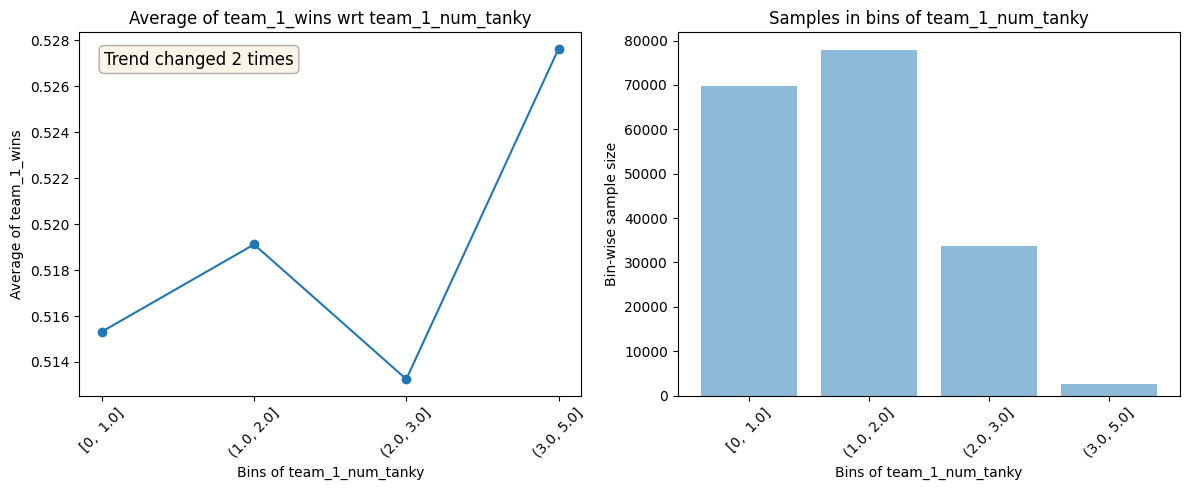

--------------------------------------------------------------------------------------------------------------


                                      Plots for team_2_num_tanky                                      


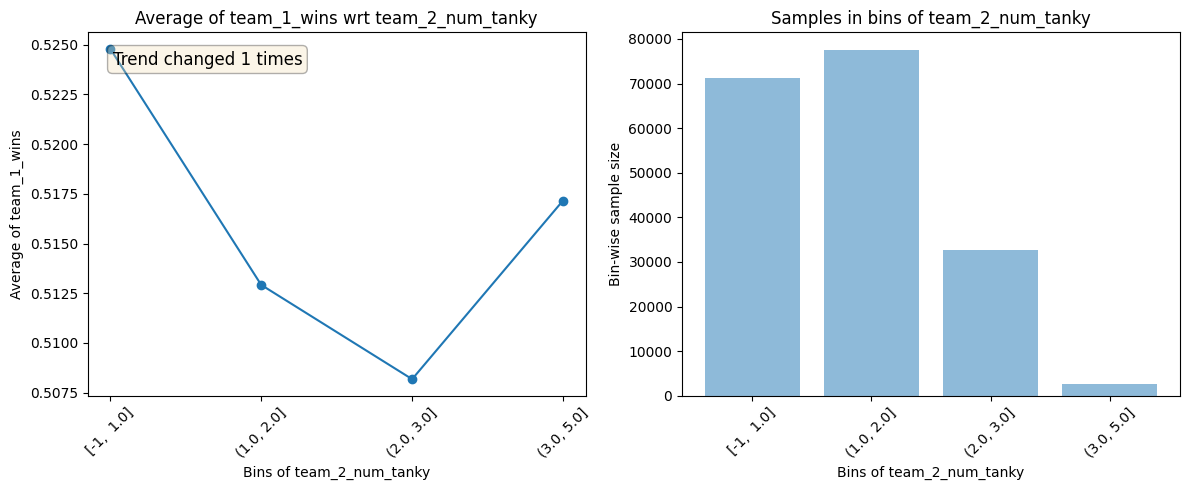

--------------------------------------------------------------------------------------------------------------


                                     Plots for team_1_is_duelists                                     


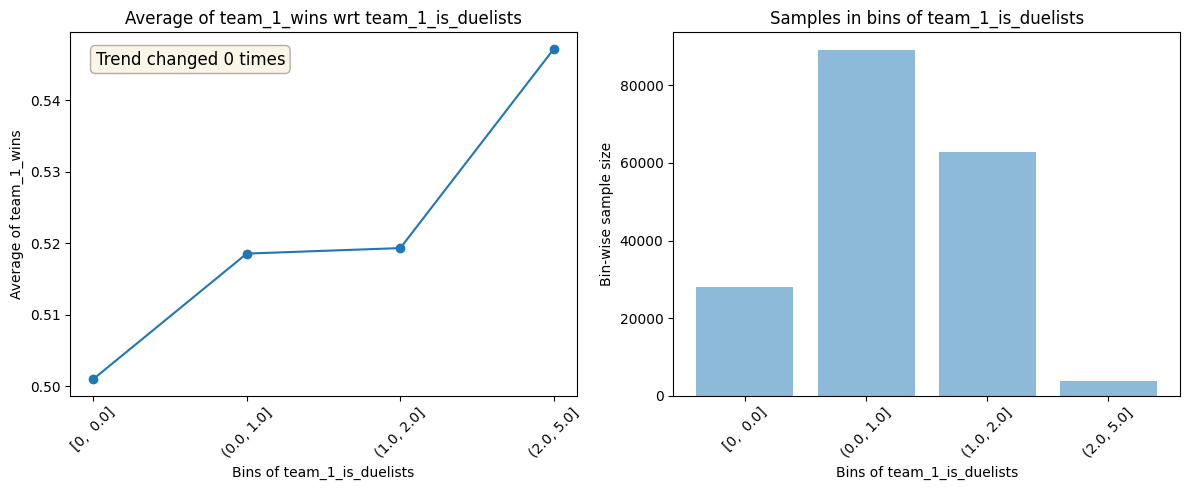

--------------------------------------------------------------------------------------------------------------


                                     Plots for team_2_is_duelists                                     


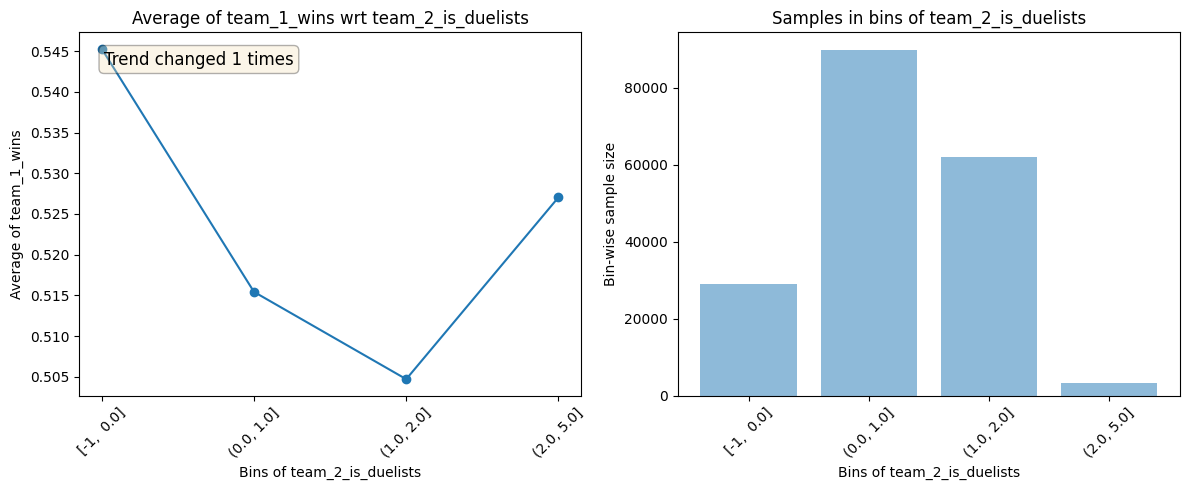

--------------------------------------------------------------------------------------------------------------


                                     Plots for team_1_is_supports                                     


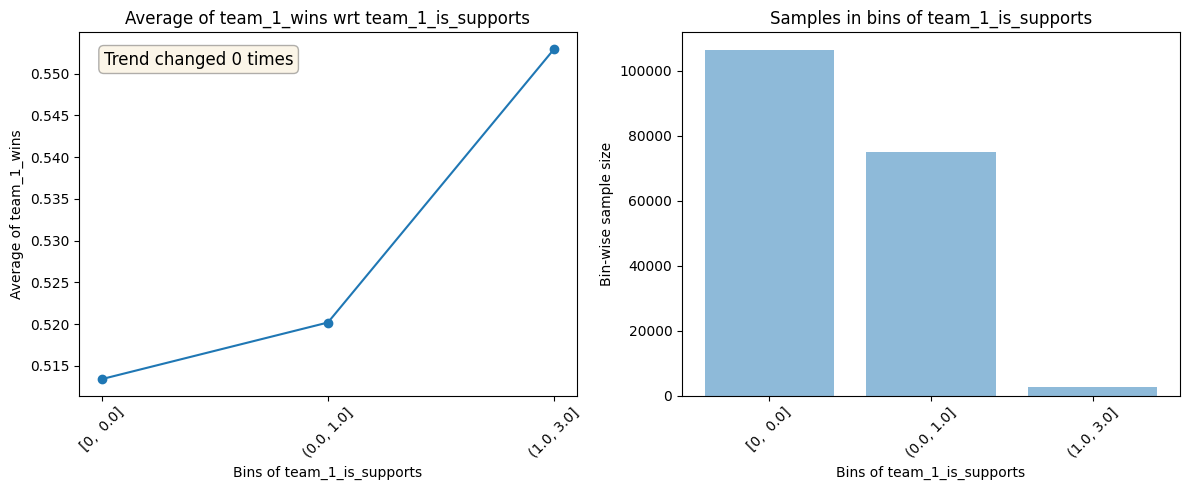

--------------------------------------------------------------------------------------------------------------


                                     Plots for team_2_is_supports                                     


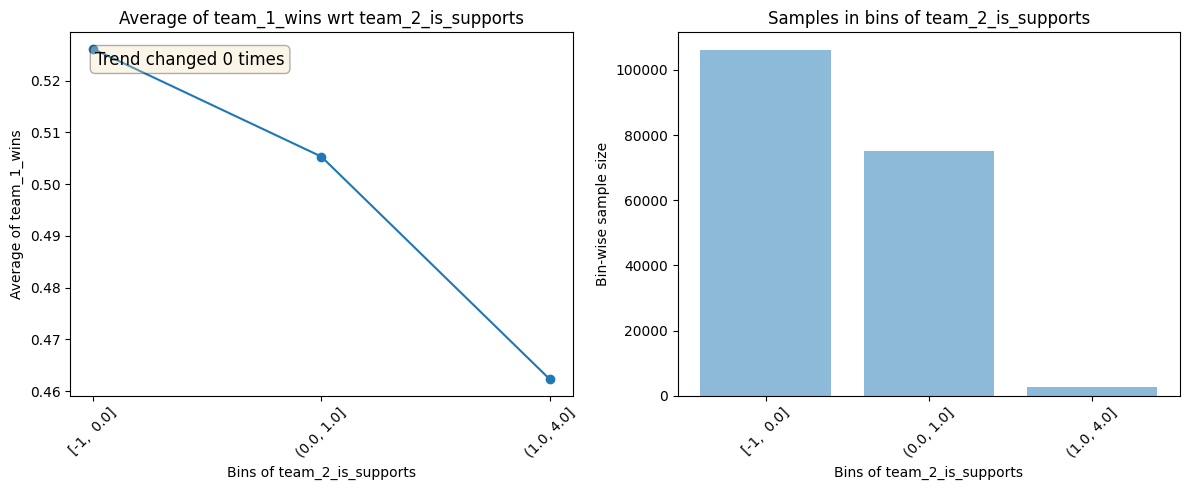

--------------------------------------------------------------------------------------------------------------


                                  Plots for team_1_is_glass_cannons                                   


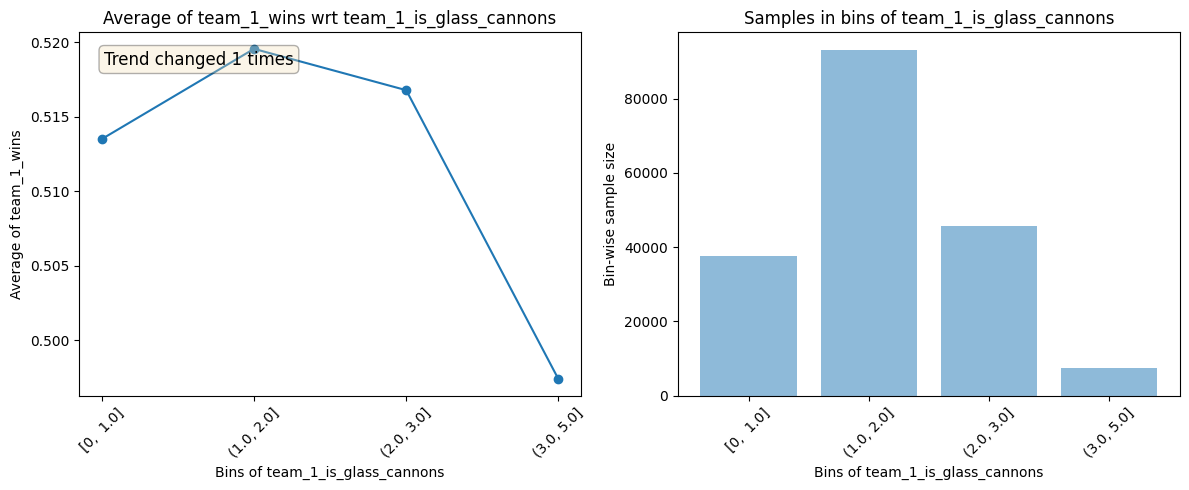

--------------------------------------------------------------------------------------------------------------


                                  Plots for team_2_is_glass_cannons                                   


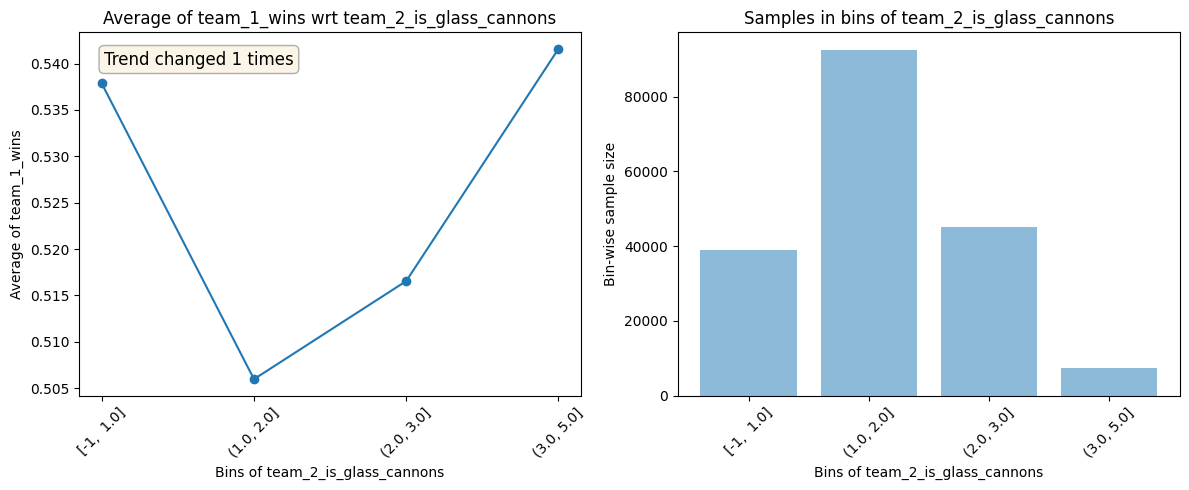

--------------------------------------------------------------------------------------------------------------


                                      Plots for team_1_is_tanks                                       


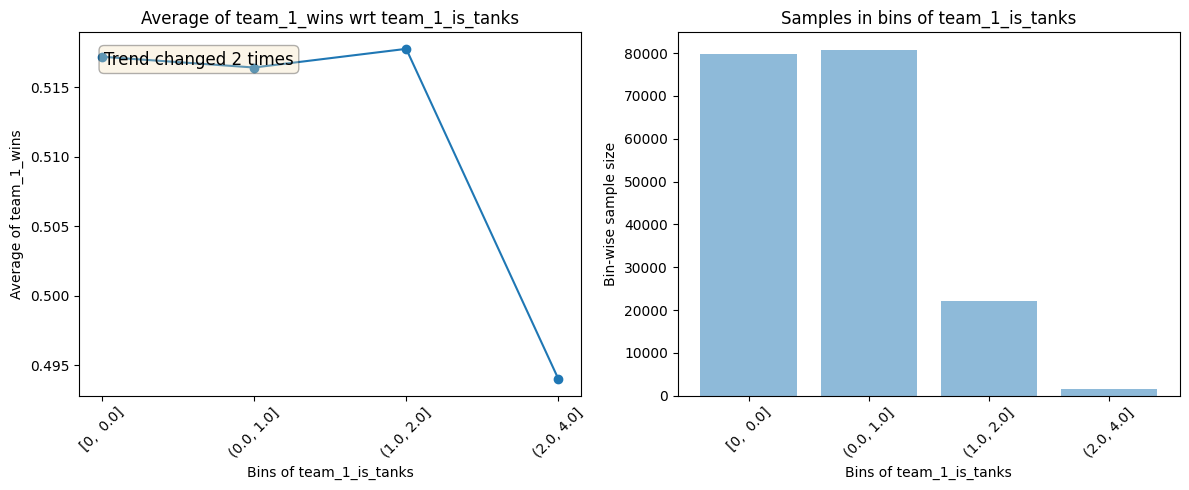

--------------------------------------------------------------------------------------------------------------


                                      Plots for team_2_is_tanks                                       


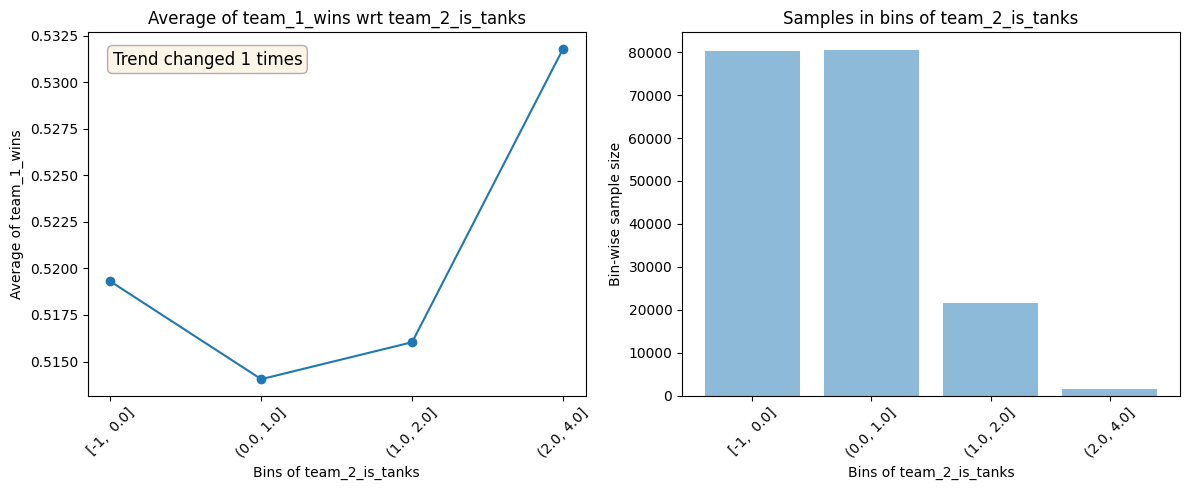

--------------------------------------------------------------------------------------------------------------


                                  Plots for team_1_is_chase_runners                                   


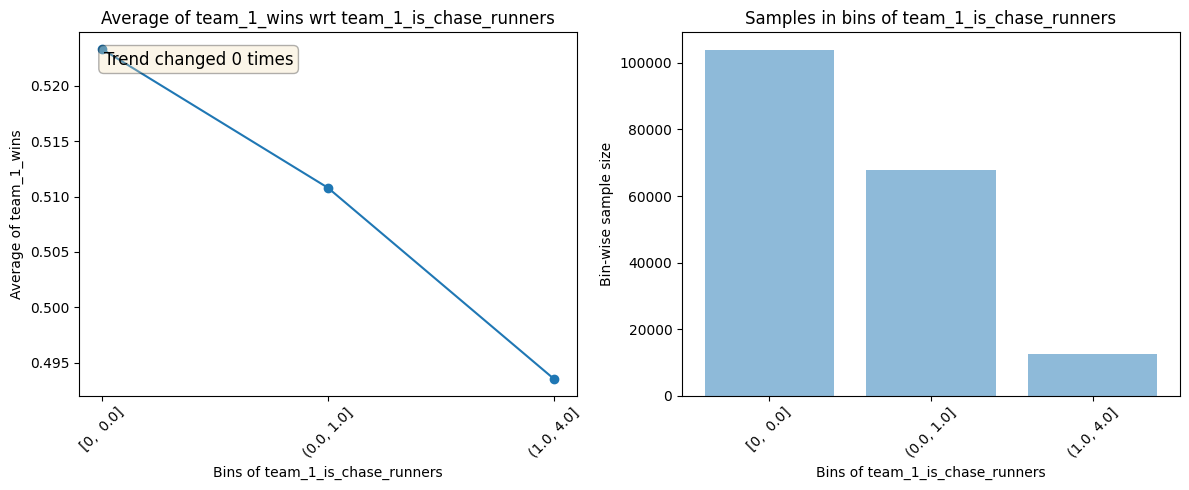

--------------------------------------------------------------------------------------------------------------


                                  Plots for team_2_is_chase_runners                                   


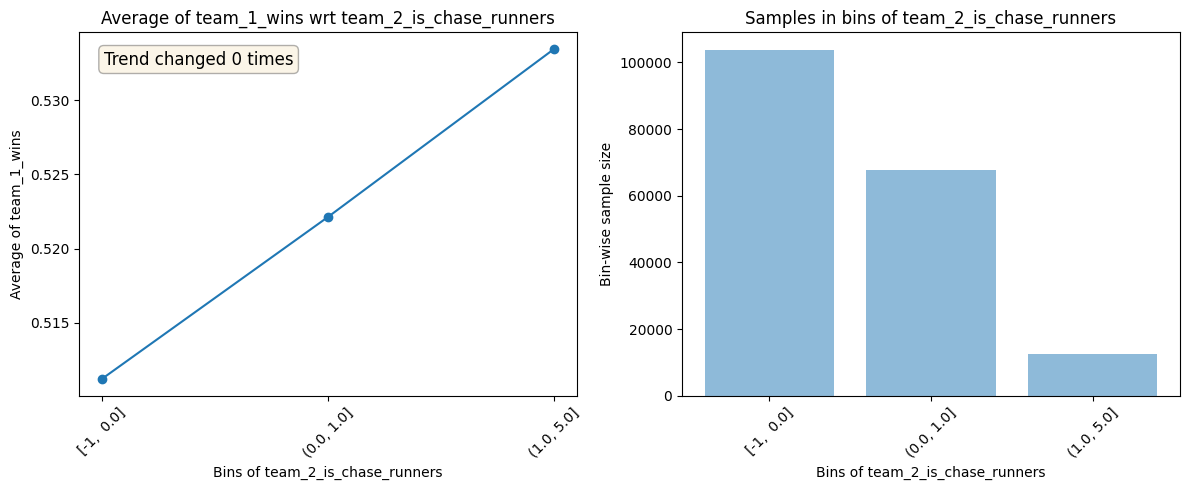

--------------------------------------------------------------------------------------------------------------


                                       Plots for team_1_Earlys                                        


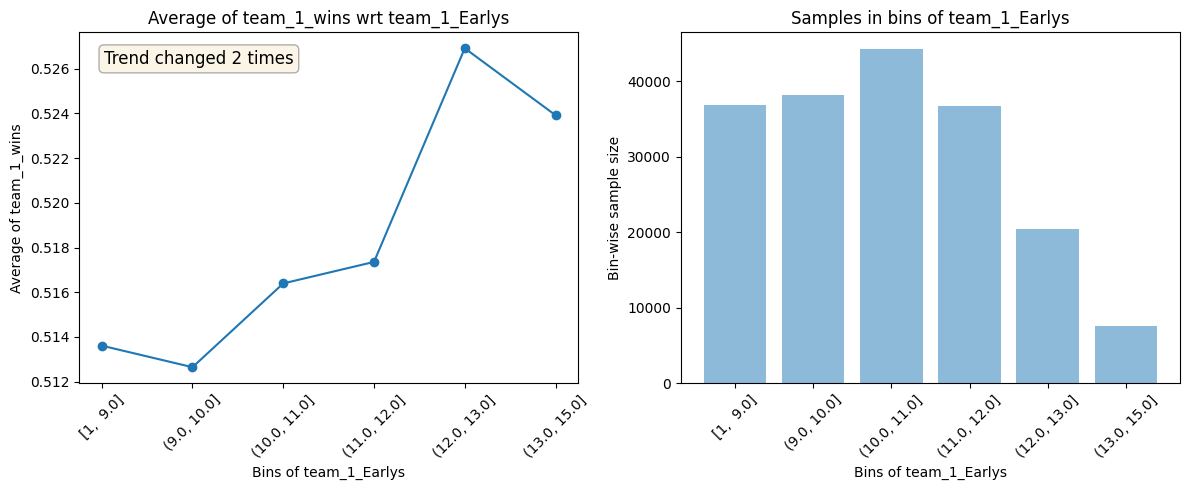

--------------------------------------------------------------------------------------------------------------


                                       Plots for team_2_Earlys                                        


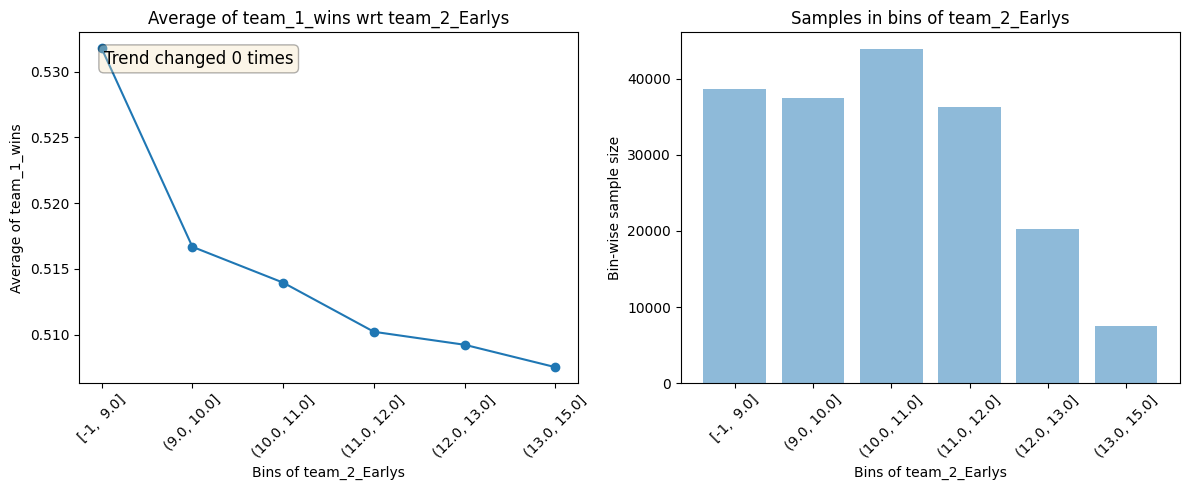

--------------------------------------------------------------------------------------------------------------


                                       Plots for team_1_Middles                                       


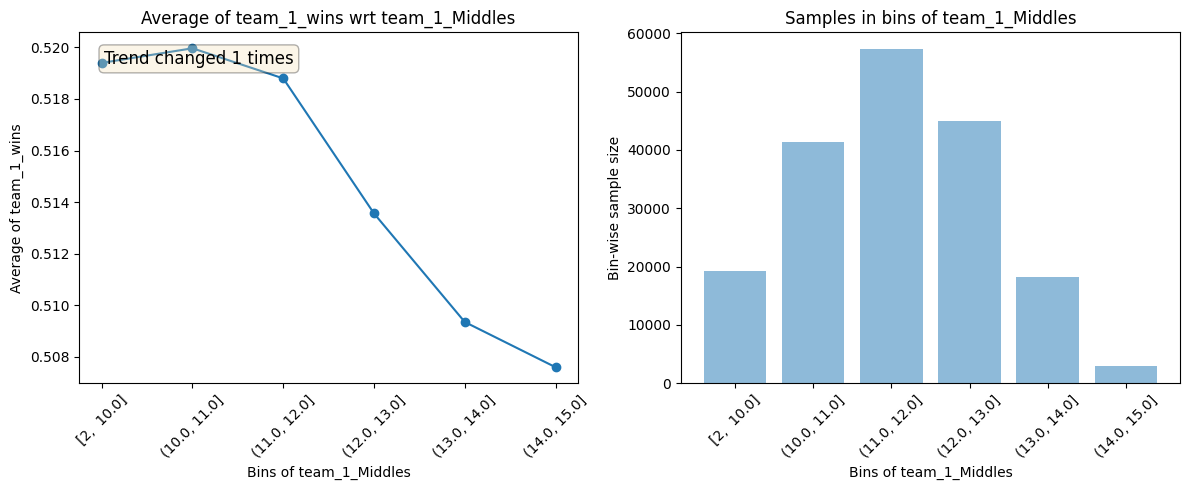

--------------------------------------------------------------------------------------------------------------


                                       Plots for team_2_Middles                                       


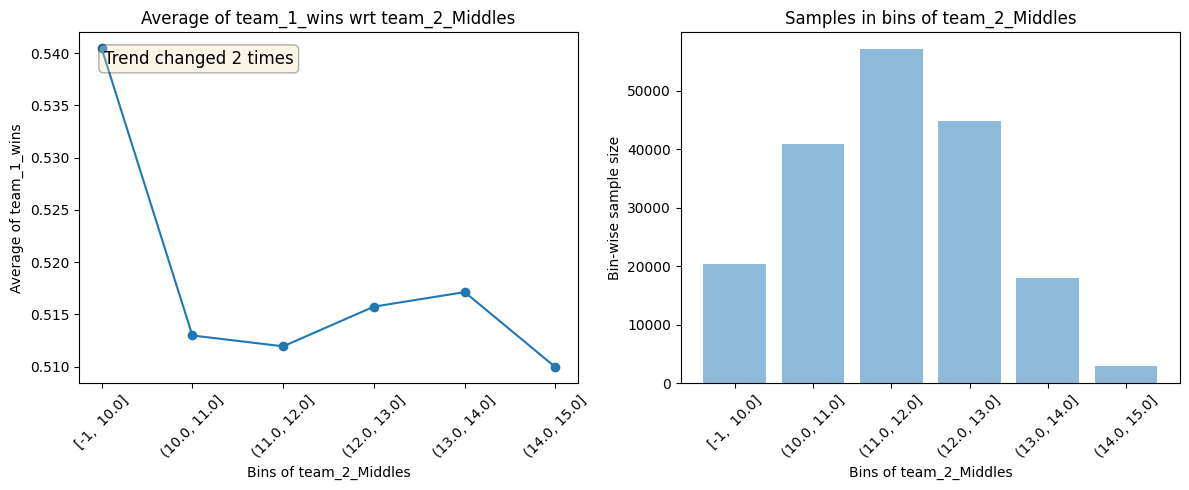

--------------------------------------------------------------------------------------------------------------


                                        Plots for team_1_Lates                                        


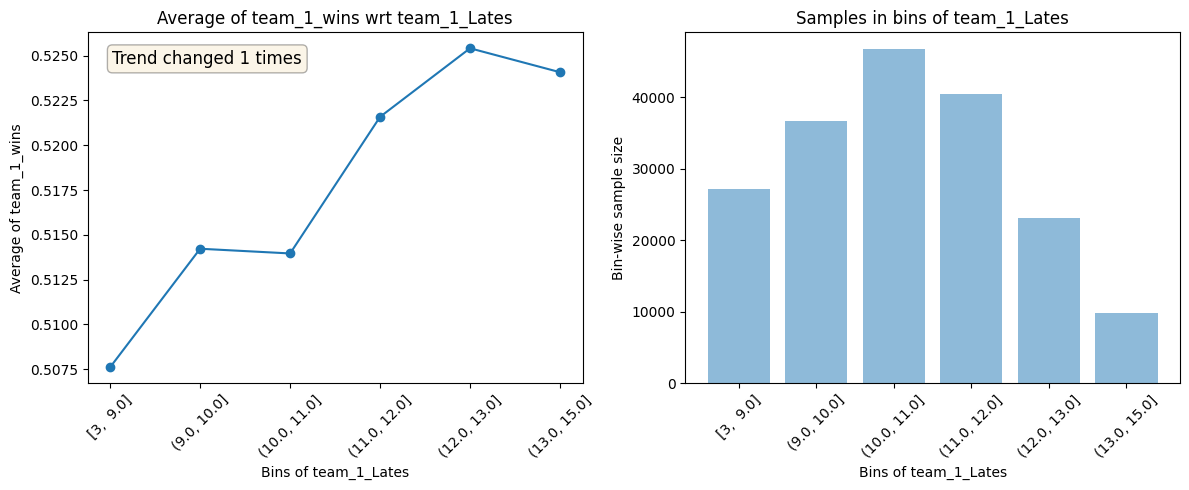

--------------------------------------------------------------------------------------------------------------


                                        Plots for team_2_Lates                                        


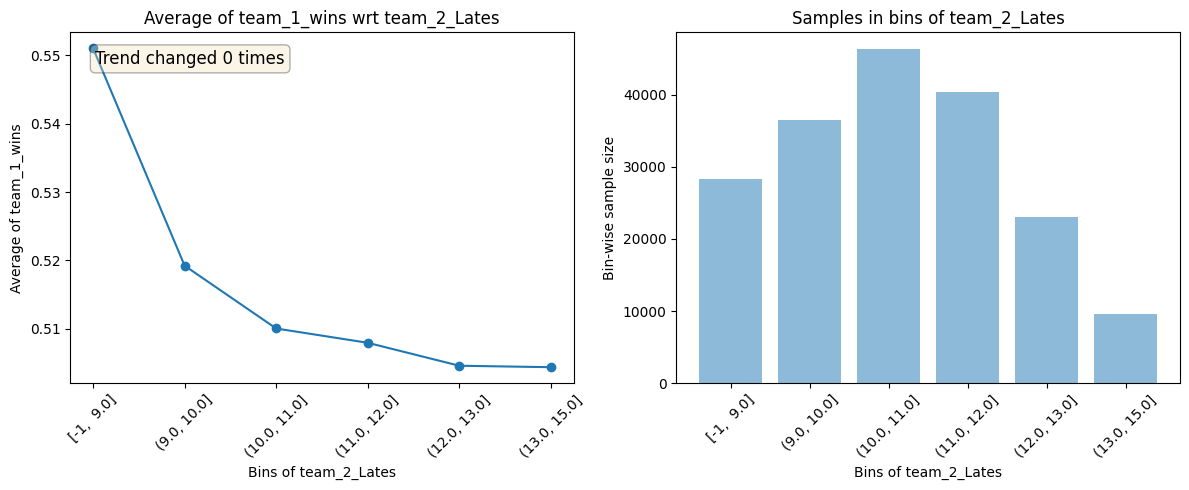

--------------------------------------------------------------------------------------------------------------




In [107]:
from featexp import get_univariate_plots
get_univariate_plots(data=match_df, target_col='team_1_wins', features_list=match_df.columns)


In [109]:
match_df2 = match_df.copy()
def get_delta(x, y):
    return x-y
match_df2['team_1_Earlys_delta'] = match_df2[['team_1_Earlys', 'team_2_Earlys']].apply(lambda x: get_delta(*x), axis='columns')
match_df2['team_1_Lates_delta'] = match_df2[['team_1_Lates', 'team_2_Lates']].apply(lambda x: get_delta(*x), axis='columns')
match_df2


,team_1_wins,team_1_num_tanky,team_2_num_tanky,team_1_is_duelists,team_2_is_duelists,team_1_is_supports,team_2_is_supports,team_1_is_glass_cannons,team_2_is_glass_cannons,team_1_is_tanks,team_2_is_tanks,team_1_is_chase_runners,team_2_is_chase_runners,team_1_Earlys,team_2_Earlys,team_1_Middles,team_2_Middles,team_1_Lates,team_2_Lates,team_1_Earlys_delta,team_1_Lates_delta
matchid,,,,,,,,,,,,,,,,,,,,,
10,0,1,2,2,1,1,0,2,3,0,1,0,0,11,9,12,13,11,10,2,1
11,0,0,2,1,2,0,0,3,3,0,0,1,0,9,14,11,10,12,9,-5,3
12,0,1,1,0,1,1,1,3,3,1,0,0,0,9,10,12,12,13,11,-1,2
13,0,2,1,1,1,0,1,1,2,1,1,2,0,11,8,12,11,8,12,3,-4
14,0,3,2,2,2,0,0,2,3,1,0,0,0,11,14,10,12,13,8,-3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187584,1,1,2,1,2,1,0,1,3,1,0,1,0,10,13,11,11,11,11,-3,0
187585,1,2,1,1,1,0,1,1,1,1,0,2,2,11,11,11,13,12,9,0,3
187586,1,3,2,2,2,1,1,1,1,0,0,1,1,11,11,13,11,10,11,0,-1


                                    Plots for team_1_Earlys_delta                                     


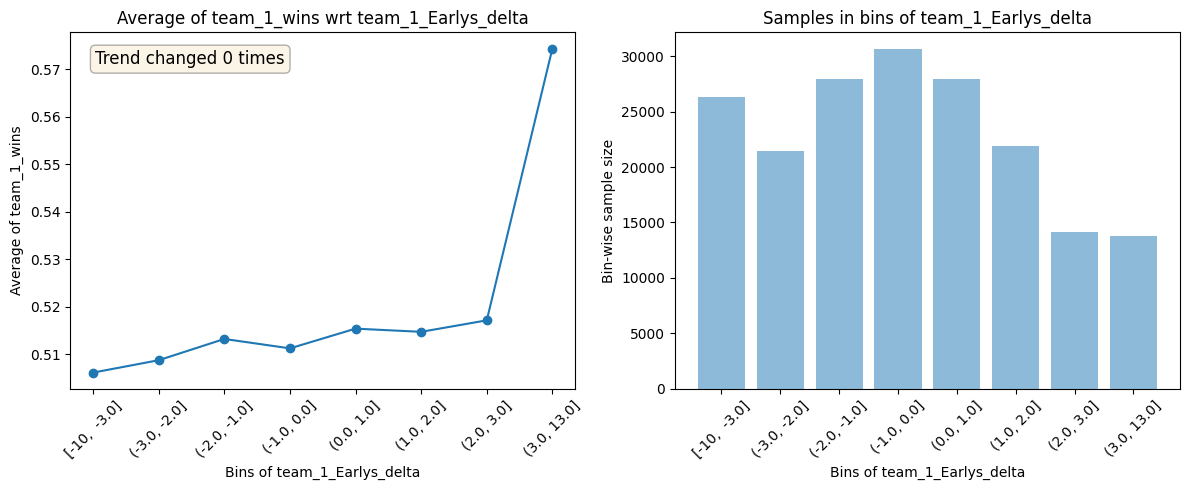

--------------------------------------------------------------------------------------------------------------


                                     Plots for team_1_Lates_delta                                     


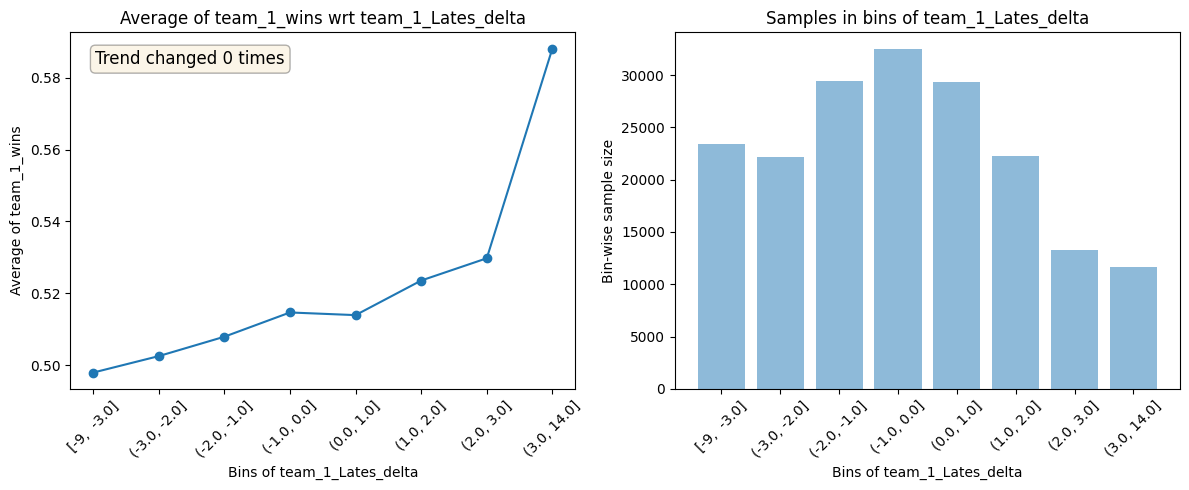

--------------------------------------------------------------------------------------------------------------




In [111]:
from featexp import get_univariate_plots
get_univariate_plots(data=match_df2, target_col='team_1_wins', features_list=['team_1_Earlys_delta', 'team_1_Lates_delta'])


In [113]:
match_df2['Earlys_boolean'] = match_df2['team_1_Earlys'].apply(lambda x: 1 if x >= 12 else 0)
match_df2['Lates_boolean'] = match_df2['team_1_Lates'].apply(lambda x: 1 if x >= 12 else 0)

In [114]:
match_df2.groupby(['Earlys_boolean', 'Lates_boolean'])['team_1_wins'].mean()

Earlys_boolean  Lates_boolean
0               0                0.507446
                1                0.520495
1               0                0.517722
                1                0.538970
Name: team_1_wins, dtype: float64